<a href="https://colab.research.google.com/github/MohamedSalihDev/Tesla-TSLA-Stock-Price-prediction-using-Facebook-Prophet/blob/main/Learner_Notebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis

#fbprophet = Forecasting
import fbprophet
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv("TSLA.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df, x="Date", y="Close")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.bar(df,y="Volume")

In [ ]:
px.box(df, y="Close")

# Understanding Facebook Prophet

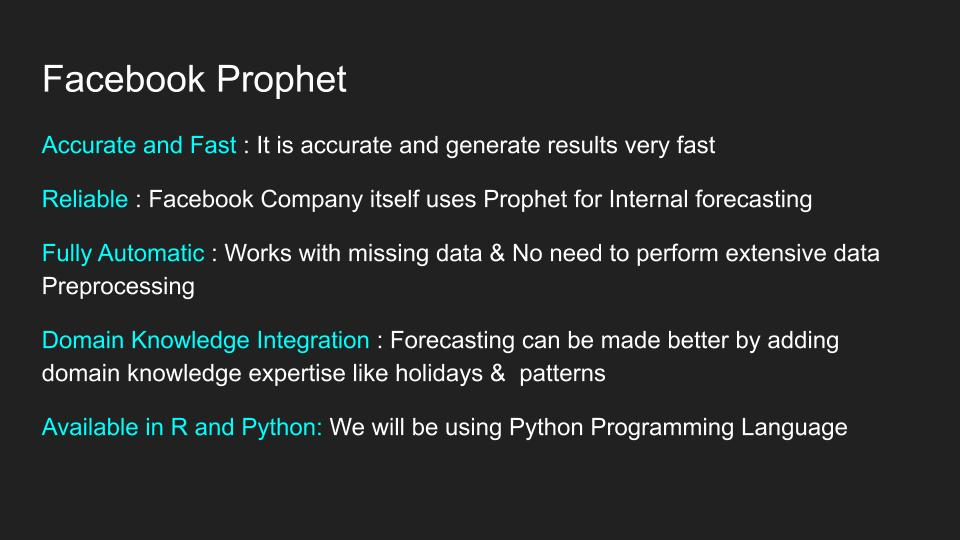

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [ ]:
columns = ['Date', "Close"]
ndf = pd.DataFrame(df, columns=columns)

In [ ]:
prophet_df= ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


## Creating Facebook Prophet Model

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,65.592384,-31.337735,145.699959,65.592384,65.592384,-5.865511,-5.865511,-5.865511,-5.865511,-5.865511,-5.865511,0.0,0.0,0.0,59.726873
1,2020-03-17,67.387841,-20.645212,147.860508,67.387841,67.387841,-2.388676,-2.388676,-2.388676,-2.388676,-2.388676,-2.388676,0.0,0.0,0.0,64.999165
2,2020-03-18,69.183298,-16.147431,152.860968,69.183298,69.183298,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,0.0,0.0,0.0,65.687256
3,2020-03-19,70.978755,-16.482375,151.131011,70.978755,70.978755,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,0.0,0.0,0.0,67.133917
4,2020-03-20,72.774212,-20.744489,148.891461,72.774212,72.774212,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,0.0,0.0,0.0,65.013650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,900.261779,813.102254,983.916710,899.066228,901.540964,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,0.0,0.0,0.0,896.765737
277,2021-04-08,902.718796,809.489481,985.911390,901.456981,904.077570,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,0.0,0.0,0.0,898.873958
278,2021-04-09,905.175813,809.119205,980.689943,903.867169,906.626543,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,0.0,0.0,0.0,897.415251
279,2021-04-10,907.632829,839.515609,1009.439688,906.250869,909.138260,11.677815,11.677815,11.677815,11.677815,11.677815,11.677815,0.0,0.0,0.0,919.310644


In [ ]:
px.line(forecast, x='ds', y='yhat')

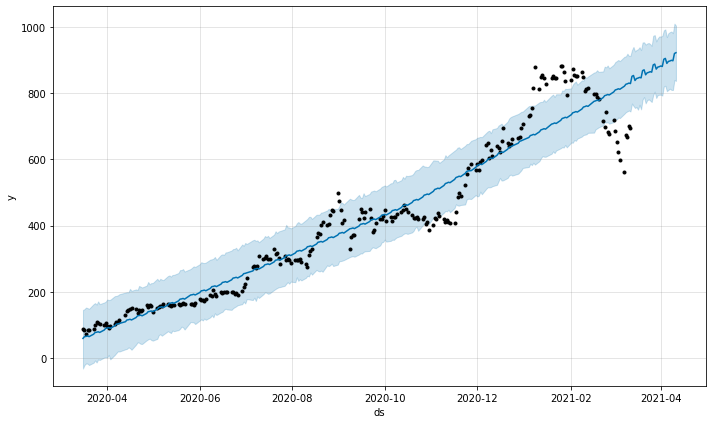

In [ ]:
figure = m.plot(forecast, xlabel = 'ds', ylabel = 'y')

##Downloading the Forecast data

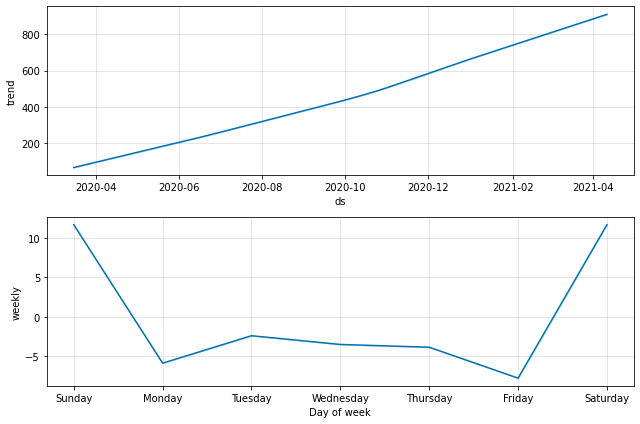

In [ ]:
figure2 = m.plot_components(forecast)

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>